In [20]:
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

from   config            import plotly_id, plotly_key
import plotly
import plotly.plotly     as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username=plotly_id, api_key=plotly_key)

# Exploratory Data Analysis

In [4]:
medals = pd.read_pickle('../dat/medals.pkl')
medals.head()

,Games,NOC,Name,Medal,Female,Gold,Silver,Bronze,Sport,Event,Summer,Year,Home Field
0,1896 Summer,AUS,5,3,0,2,0,1,2,5,1,1896,0
1,1896 Summer,AUT,8,5,0,2,1,2,3,8,1,1896,0
2,1896 Summer,DEN,15,6,0,1,2,3,5,12,1,1896,0
3,1896 Summer,FRA,26,11,0,5,4,2,6,18,1,1896,0
4,1896 Summer,GBR,25,9,0,3,3,3,7,19,1,1896,0


In [8]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3837 entries, 0 to 3836
Data columns (total 13 columns):
Games         3837 non-null object
NOC           3837 non-null object
Name          3837 non-null int64
Medal         3837 non-null int64
Female        3837 non-null int64
Gold          3837 non-null int64
Silver        3837 non-null int64
Bronze        3837 non-null int64
Sport         3837 non-null int64
Event         3837 non-null int64
Summer        3837 non-null int64
Year          3837 non-null int64
Home Field    3837 non-null int64
dtypes: int64(11), object(2)
memory usage: 389.8+ KB


In [11]:
medals.describe()

,Name,Medal,Female,Gold,Silver,Bronze,Sport,Event,Summer,Year,Home Field
count,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.00000
mean,70.658327,10.368256,19.421944,3.485014,3.418296,3.464947,6.980975,29.816523,0.732343,1981.898879,0.01251
std,117.075901,30.349213,42.536103,12.782128,10.293752,9.765239,6.380562,41.565980,0.442795,28.381436,0.11116
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1896.000000,0.00000
25%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,0.000000,1964.000000,0.00000
50%,22.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,13.000000,1.000000,1988.000000,0.00000
75%,80.000000,6.000000,17.000000,1.000000,1.000000,2.000000,10.000000,36.000000,1.000000,2004.000000,0.00000
max,1109.000000,442.000000,369.000000,187.000000,141.000000,126.000000,34.000000,270.000000,1.000000,2016.000000,1.00000


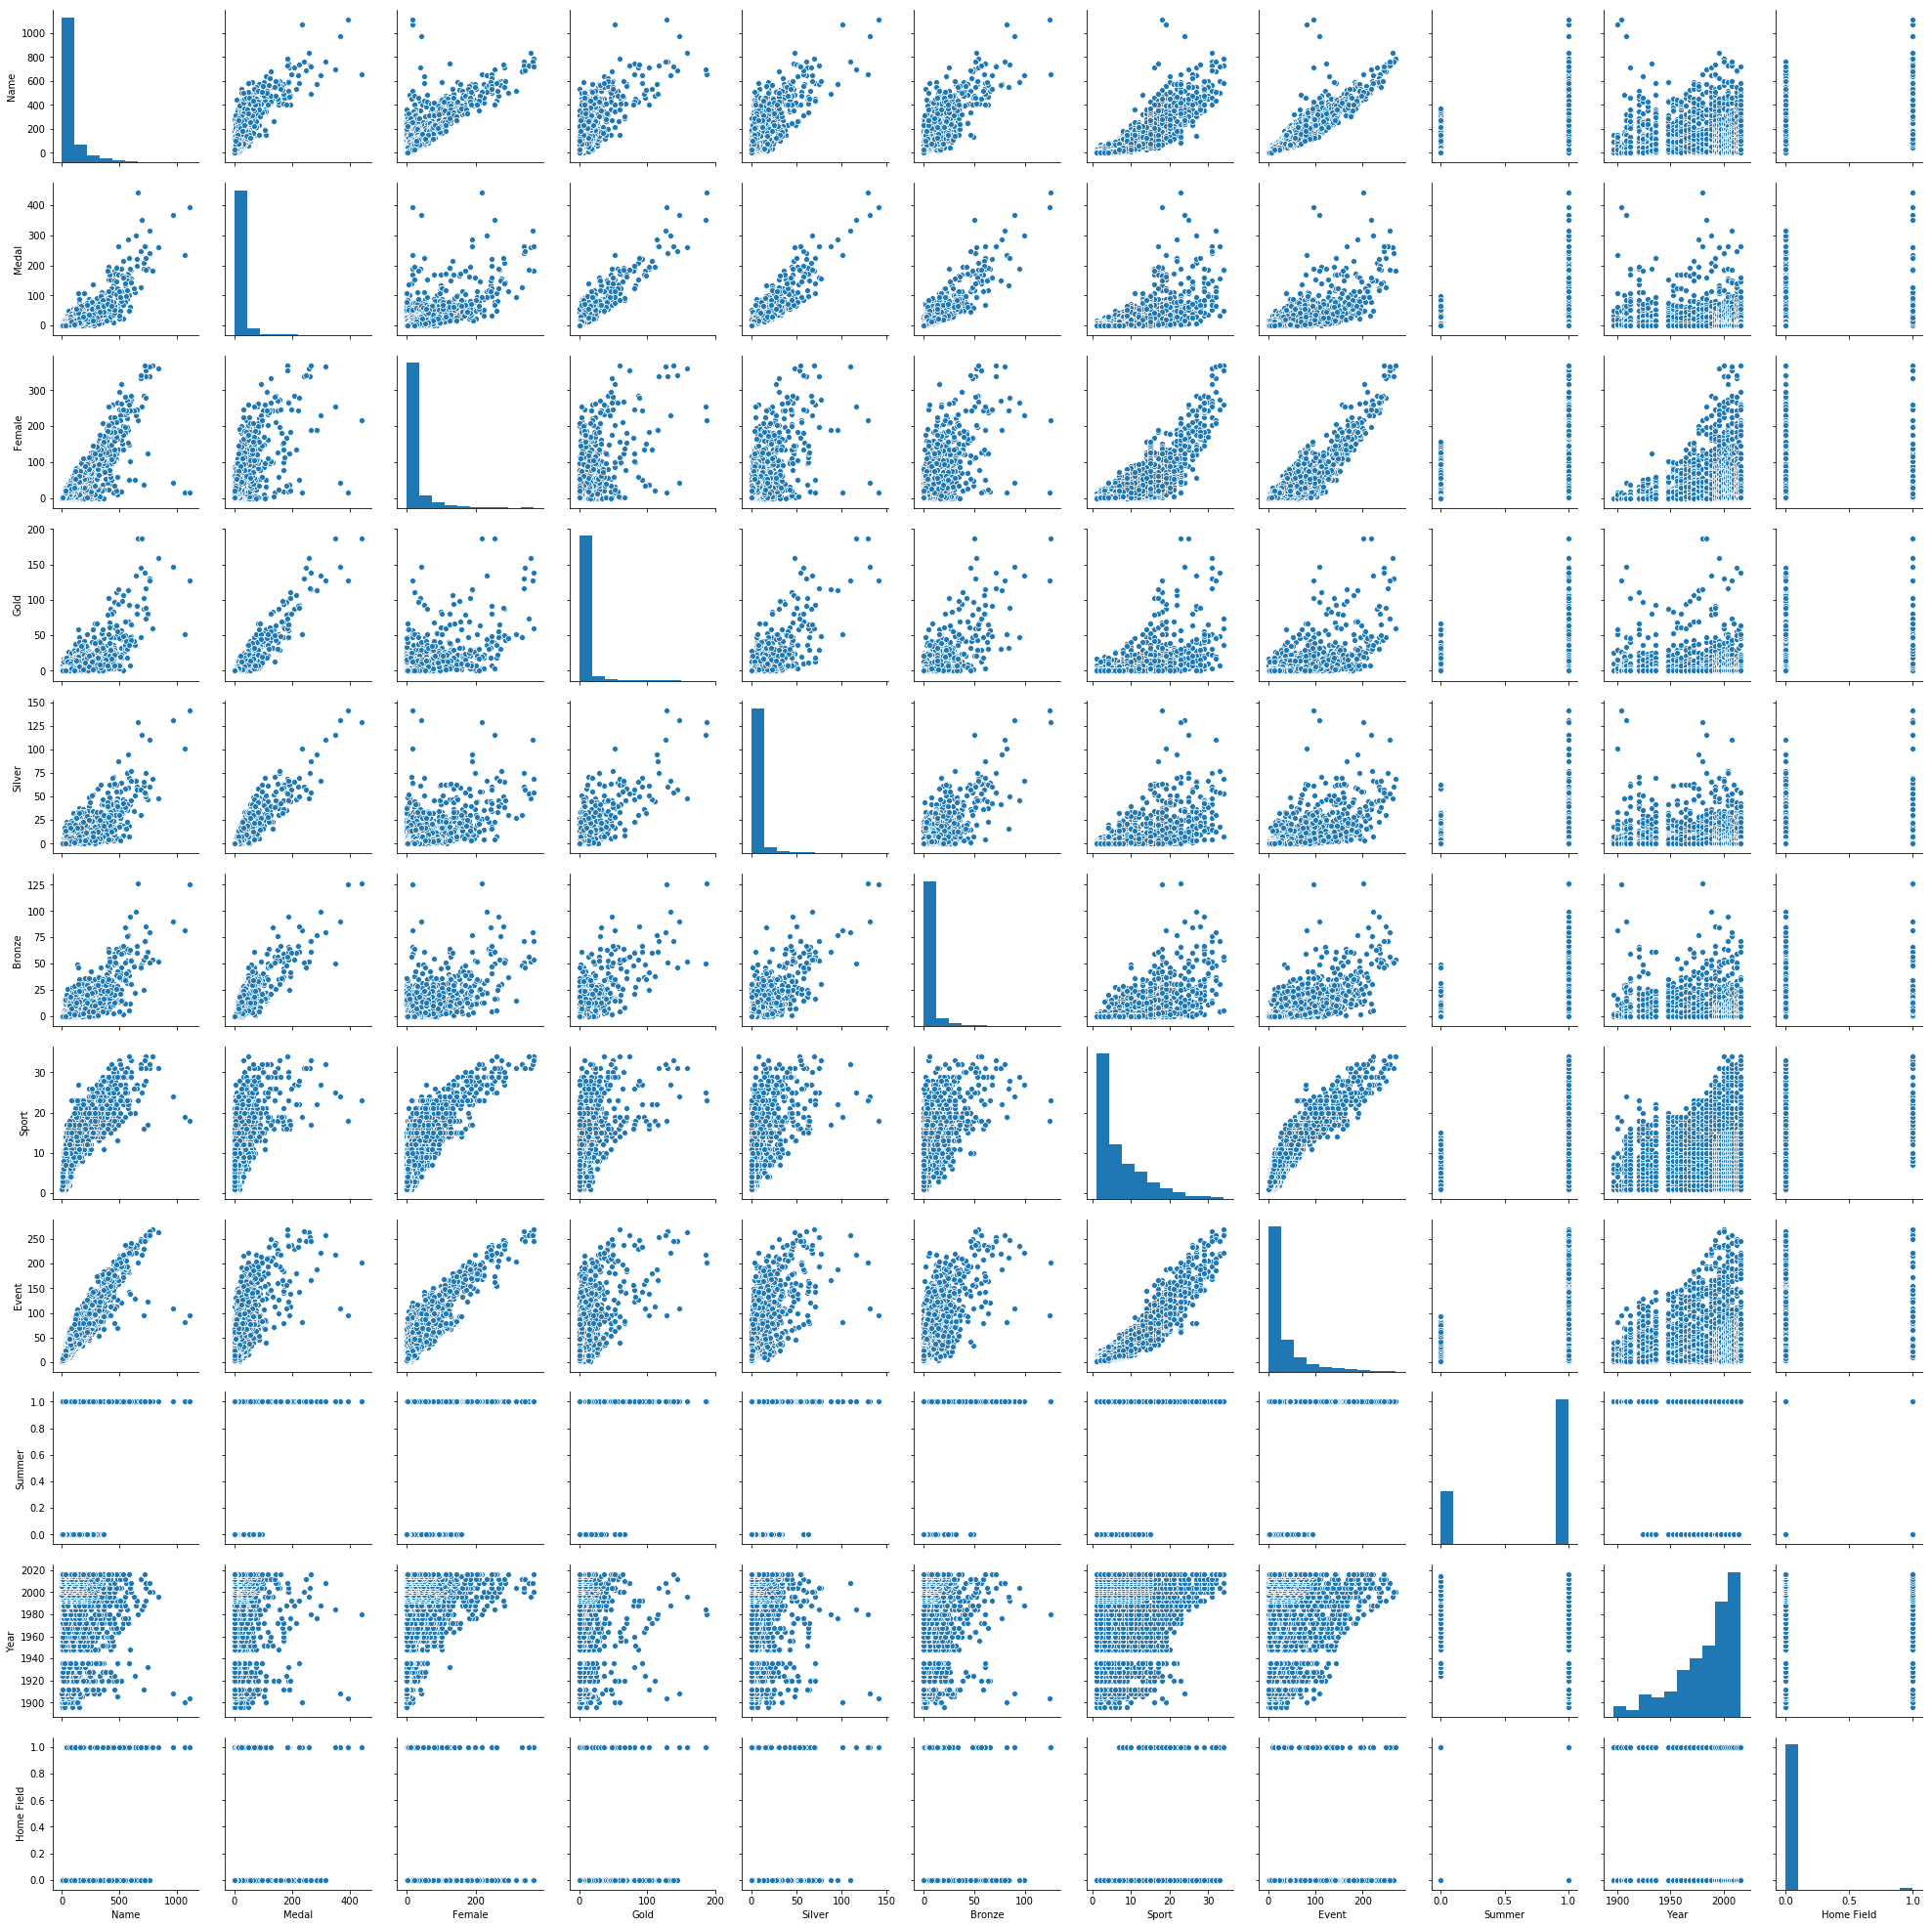

In [16]:
pairs = medals
sns.pairplot(pairs)
plt.show()

In [22]:
medals.columns

Index(['Games', 'NOC', 'Name', 'Medal', 'Female', 'Gold', 'Silver', 'Bronze',
       'Sport', 'Event', 'Summer', 'Year', 'Home Field'],
      dtype='object')

In [29]:
hover_text = []
color_range = []
for index, row in medals.iterrows():
    hover_text.append(('Games: {games}<br>'+
                       'Nation: {noc}<br>'+
                       'Roster Size: {roster}<br>'+
                       'Females: {female}<br>'+
                       'Medals: {medal}<br>'+
                       'Golds: {gold}<br>'+
                       'Silvers: {silver}<br>'+
                       'Bronzes: {bronze}<br>'+
                       'Sports: {sport}<br>'+
                       'Events: {event}<br>'+
                       'Host Nation: {host}').format(games  = row['Games'],
                                              noc    = row['NOC'],
                                              roster = row['Name'],
                                              female = row['Female'],
                                              medal  = row['Medal'],
                                              gold   = row['Gold'],
                                              silver = row['Silver'],
                                              bronze = row['Bronze'],
                                              sport  = row['Sport'],
                                              event  = row['Event'],
                                              host   = row['Home Field']))
    color_range.append(min(row['Gold'],120))

trace0 = go.Scatter(
    x      = medals['Name'],
    y      = medals['Event'],
    text   = hover_text,
    mode   = 'markers',
    marker = dict(
#        size          = medals['Medal'],
        color         = color_range,
        showscale     = True,
        reversescale  = True,
        colorscale    = 'RdBu',
        colorbar      = dict(
                title = 'Total<br>Medals<br>(2016)'
            )
    )
)

data      = [trace0]
layout    = go.Layout(
    title = 'Medal Table of the Rio 2016 Summer Olympic Games',
    xaxis = dict(
        title         = 'Roster Size of Olympic Team',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    yaxis = dict(
        title         = 'Total Number of Olympic Events',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    paper_bgcolor = 'rgb(243, 243, 243)',
    plot_bgcolor  = 'rgb(243, 243, 243)',
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'olympic-medals')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Summer and Winter Games

# Host Advantage